In [1]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math
from PIL import Image

# QUESTION 0

In [2]:
def convolution(oldimage, kernel):
    
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=(
            (kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
            kernel_w // 2),(0,0)), mode='constant', 
            constant_values=0).astype(np.float32)    
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=(
            (kernel_h // 2, kernel_h // 2),(kernel_w // 2, 
            kernel_w // 2)), mode='constant', 
            constant_values=0).astype(np.float32)
        
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
            
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return image_conv[h:h_end,w:w_end]

In [3]:
def gaussian_blur(image, sigma):
    image = np.asarray(image)
    filter_size = int(4 * sigma) + 1

    kernel = np.zeros((filter_size, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            a = 2*np.pi*(sigma**2)
            b = np.exp(-(x**2 + y**2)/(2* sigma**2))
            kernel[x+m, y+n] = b/a
    
#     im_filtered = np.zeros_like(image, dtype=np.float32)
    im_filtered = convolution(image, kernel)    
    
    return (im_filtered.astype(np.uint8))

In [4]:
# read image
image = Image.open("./office_noisy.png")
image2 = cv2.imread("./office_noisy.png", cv2.IMREAD_UNCHANGED)

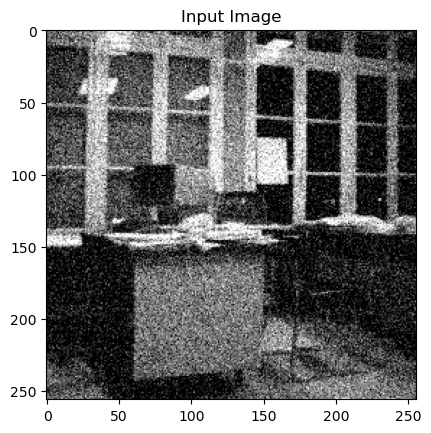

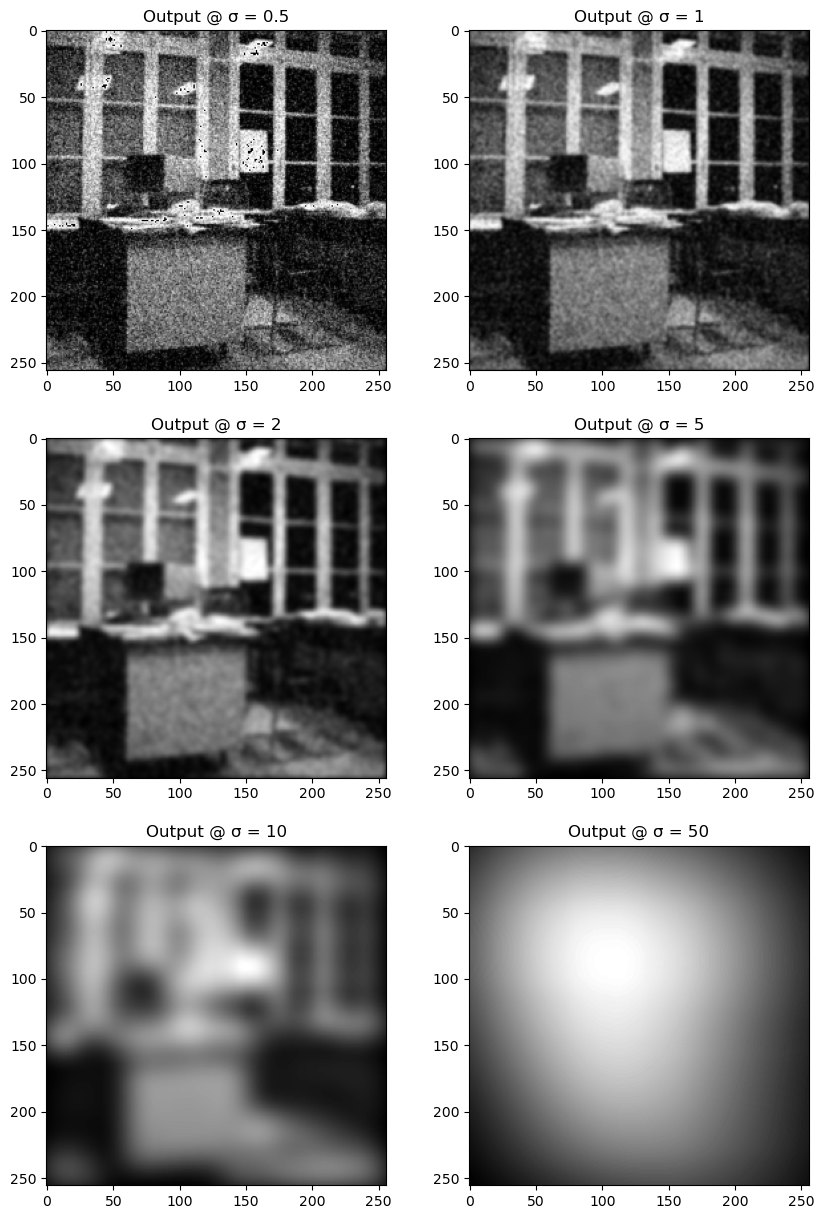

In [6]:
plt.imshow(image, cmap='gray')
plt.title("Input Image")
plt.show()
        
results = [
        {
            "image": gaussian_blur(image, 0.5),
            "title": "Output @ σ = 0.5"
        },
        {
            "image": gaussian_blur(image, 1),
            "title": "Output @ σ = 1"
        },
        {
            "image": gaussian_blur(image, 2),
            "title": "Output @ σ = 2"
        },
        {
            "image": gaussian_blur(image, 5),
            "title": "Output @ σ = 5"
        },
        {
            "image": gaussian_blur(image, 10),
            "title": "Output @ σ = 10"
        },
        {
            "image": gaussian_blur(image, 50),
            "title": "Output @ σ = 50"
        }
    ]
# _, axs = plt.subplots(2, 3, figsize=(12,8))
_, axs = plt.subplots(3, 2, figsize=(10,15))
axs = axs.flatten()
for img, ax in zip(results, axs):
    ax.imshow(img["image"], cmap='gray')
    ax.set_title(img["title"])
plt.show()
